In [1]:
library("dplyr")
library(tidyverse)
library(forecast)
library(readxl)
library('plm')
library(dlm)
library(ggplot2)
library(zoo)
library(lattice)
library(dygraphs)
library(MASS) 
library(PerformanceAnalytics)
library('pastecs')
library(sn)
library(tseries)
library(lubridate)
library(aTSA)
library("TTR")
library('TSstudio')
library("numDeriv")
require(ggfortify)  #for plotting timeseries
require('TTR')
library(tsbox)
library(quantmod)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 

In [2]:
#getSymbols("NG", header=TRUE, row.names="Date")
NG <- getSymbols("NG", auto.assign = FALSE) # OHLCVA data
head(NG)
tail(NG)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



           NG.Open NG.High NG.Low NG.Close NG.Volume NG.Adjusted
2007-01-03   16.90   16.96  16.00    16.25    756800       16.25
2007-01-04   16.01   16.03  15.89    15.96    889700       15.96
2007-01-05   15.85   16.04  15.50    16.04    854500       16.04
2007-01-08   15.97   16.12  15.90    16.08    338700       16.08
2007-01-09   16.08   16.08  15.87    15.97    516500       15.97
2007-01-10   15.90   15.96  15.77    15.94    512900       15.94

           NG.Open NG.High NG.Low NG.Close NG.Volume NG.Adjusted
2020-02-27    9.42    9.42   8.68    8.700   3256400       8.700
2020-02-28    8.01    8.39   7.60    7.980   5116800       7.980
2020-03-02    8.22    8.65   8.10    8.590   2419900       8.590
2020-03-03    8.70    9.27   8.37    8.610   5643400       8.610
2020-03-04    8.84    8.84   8.36    8.630   2443100       8.630
2020-03-05    8.81    8.87   8.58    8.625    706535       8.625

In [4]:
#cycle(NG)

In [19]:
#time(NG) <- as.yearmon(time(NG))
#time(NG)

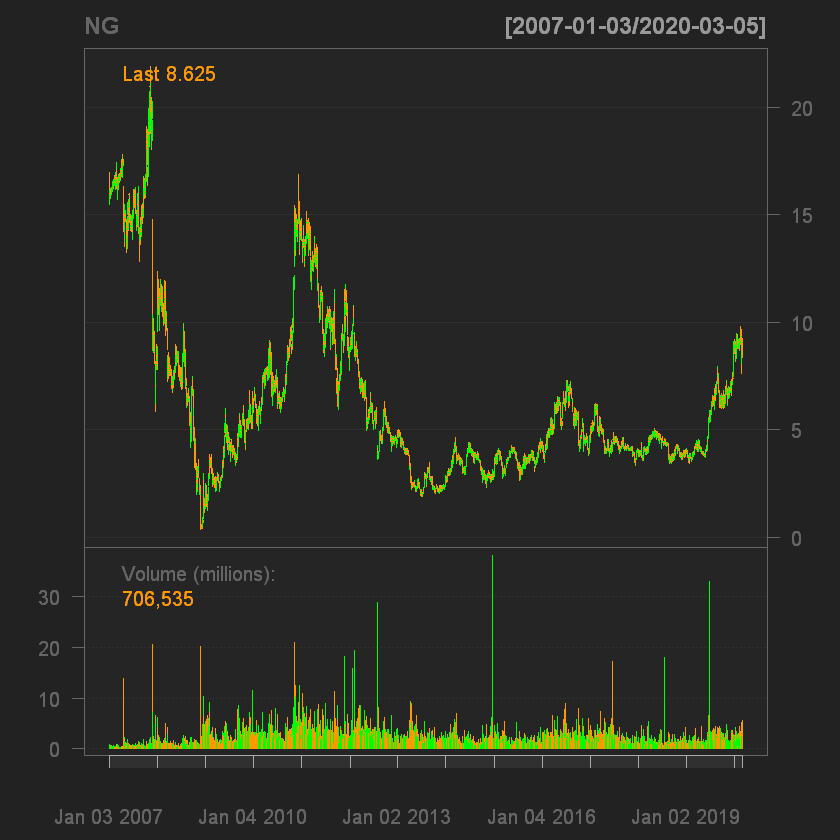

In [3]:
barChart(NG)
#candleChart(NG, up.col='green',dn.col='red')
#chartSeries(to.weekly(NG),up.col='green',dn.col='red')

In [4]:
# Getting OHLC data
NG_ohlc <-OHLC(NG)
str(NG_ohlc)
#colSums(is.na(NG_ohlc)) # checking missing values

An 'xts' object on 2007-01-03/2020-03-05 containing:
  Data: num [1:3316, 1:4] 16.9 16 15.8 16 16.1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "NG.Open" "NG.High" "NG.Low" "NG.Close"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2020-03-06 00:35:10"


In [5]:
stat.desc(NG_ohlc, basic=TRUE, norm=TRUE, p=0.95)

NG.Open      NG.High      NG.Low       NG.Close    
nbr.val      3.316000e+03 3.316000e+03 3.316000e+03 3.316000e+03
nbr.null     0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
nbr.na       0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
min          4.500000e-01 4.800000e-01 3.700000e-01 4.500000e-01
max          2.191000e+01 2.191000e+01 2.066000e+01 2.094000e+01
range        2.146000e+01 2.143000e+01 2.029000e+01 2.049000e+01
sum          2.077254e+04 2.124149e+04 2.025323e+04 2.073346e+04
median       4.780000e+00 4.905000e+00 4.660000e+00 4.780000e+00
mean         6.264337e+00 6.405757e+00 6.107729e+00 6.252553e+00
SE.mean      6.590678e-02 6.686742e-02 6.465807e-02 6.574886e-02
CI.mean.0.95 1.292221e-01 1.311056e-01 1.267738e-01 1.289125e-01
var          1.440372e+01 1.482667e+01 1.386309e+01 1.433478e+01
std.dev      3.795224e+00 3.850541e+00 3.723317e+00 3.786130e+00
coef.var     6.058461e-01 6.011064e-01 6.096074e-01 6.055334e-01
skewness     1.477335e+00 1.467020e+00 1.487763e+00 1.477056e+00
skew.2SE     1.737309e+01 1.725178e+01 1.749572e+01 1.736980e+01
kurtosis     1.575414e+00 1.538203e+00 1.615063e+00 1.577556e+00
kurt.2SE     9.266019e+00 9.047162e+00 9.499221e+00 9.278621e+00
normtest.W   8.339258e-01 8.347896e-01 8.335236e-01 8.345488e-01
normtest.p   2.766383e-50 3.384023e-50 2.519307e-50 3.198861e-50

- nbr.val, nbr.null, nbr.na = the number of values, number of null values and number of missing values,
- min & max = the minimal & maximal value,
- range = the range (that is, max-min)
- sum = the sum of all non-missing values
- SE.mean = the standard error on the mean,
- CI.mean = the confidence interval of the mean at the p leve the variance (var), the standard deviation (std.dev)
- coef.var = the variation coefficient defined as the standard deviation divided by the mean
- skewness = the skewness coefficient g1, its significant criterium (skew.2SE, that is, g1/2.SEg1; if skew.2SE > 1, then skewness is significantly different than zero),
- kurtosis = kurtosis coefficient g2, its significant criterium (kurt.2SE, same remark than for skew.2SE),
- normtest.W = the statistic of a Shapiro-Wilk test of normality and its associated probability (normtest.p)
- p = the probability level to use to calculate the confidence interval on the mean (CI.mean). By default, p=0.95

In [6]:
nmonths(NG_ohlc) # number of months
# start and end dates
start(NG_ohlc)
end(NG_ohlc) 

[1] 159

[1] "2007-01-03"

[1] "2020-03-05"

###### We can see the time series object i.e. a vector containing the data together with information about start/end time and sampling frequency (monthly)

In [7]:
dygraph(OHLC(NG_ohlc), ylab='Price (US$)')

HTML widgets cannot be represented in plain text (need html)

This series looks clearly non-stationary and in fact quite irregular. The analysis of non-stationary time series with ARMA models requires at least a preliminary transformation of the data to get stationarity; but we might feel more natural to have models which allow to analyze more directly data which show instability in the mean level and in the variance, structural breaks, sudden jumps.

- We can see from this time series that there is certainly some seasonal variation in the price; there is a peak every winter, and a trough every winter. 

- Again the it seems like this could be described using an additive model, as the seasonal fluctuations are roughly constant in size over time and do not seem to depend on the level of the time series, and the random fluctuations seem constant over time.

In [8]:
NG1 <- tail(NG_ohlc, n=30)
graph<-dygraph(OHLC(NG1), ylab = 'Price(US$)')
dyCandlestick(graph)

HTML widgets cannot be represented in plain text (need html)

           NG.Close
2019-10-31 6.506087
2019-11-29 6.704000
2019-12-31 7.580476
2020-01-31 8.829048
2020-02-28 9.058421
2020-03-05 8.613750

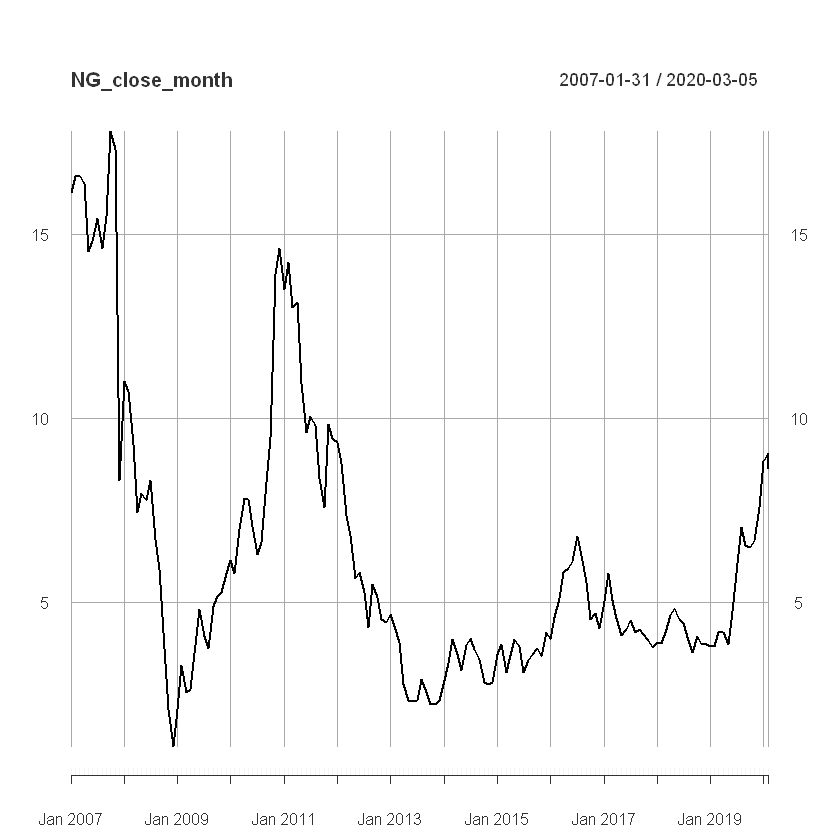

In [9]:
# Extracting the "close" column from data set
NG_close <- Cl(NG)

# converting daily data to monthly mean for faster computation
NG_close_month <- apply.monthly(NG_close, mean)

tail(NG_close_month['2007-03/'])

plot(NG_close_month) # plotting Close price


In [10]:
# setting up "Date" column
row.names(NG_close_month)
# NULL
NG_close_month <- as.data.frame(NG_close_month)
NG_close_month$Date <- row.names(NG_close_month)

cln <- ncol(NG_close_month) 
NG_close_month <- NG_close_month[, c(cln, 1:(cln-1))]
row.names(NG_close_month) <- NULL
head(NG_close_month)

NULL

Date       NG.Close
1 2007-01-31 16.14600
2 2007-02-28 16.59421
3 2007-03-30 16.61364
4 2007-04-30 16.40800
5 2007-05-31 14.53864
6 2007-06-29 14.82095

In [11]:
str(NG_close_month)

'data.frame':	159 obs. of  2 variables:
 $ Date    : chr  "2007-01-31" "2007-02-28" "2007-03-30" "2007-04-30" ...
 $ NG.Close: num  16.1 16.6 16.6 16.4 14.5 ...


In [12]:
# converting the dataframe to time series
df1 = ts(NG_close_month$'NG.Close', start= c(2007,1), 
         end = c(2020,3), frequency = 12)

#xyplot(df1, ylab = "Price (US $)", main = "Time series plot for Schlumberger Adj Close price")

We see that price drooped significantly from nealry dollar 20  to close to dollar 1 during 2008/2009, before being going up till around dollar 15 during 2010/2011; however, a highly volatile state since can be seen all across as on date.

## Diagnostics
#### Normality test
In probability, a distribution is a table of values or a mathematical function that links every possible value of a variable to the probability that such value could occur. Probability distributions are usually (but not solely) represented in charts whose abscissa axis represents the possible values of the variable and whose ordinal axis represents the probability of occurrence. Most statistical models rely on a normal distribution, a distribution that is symmetric and has a characteristic bell shape.

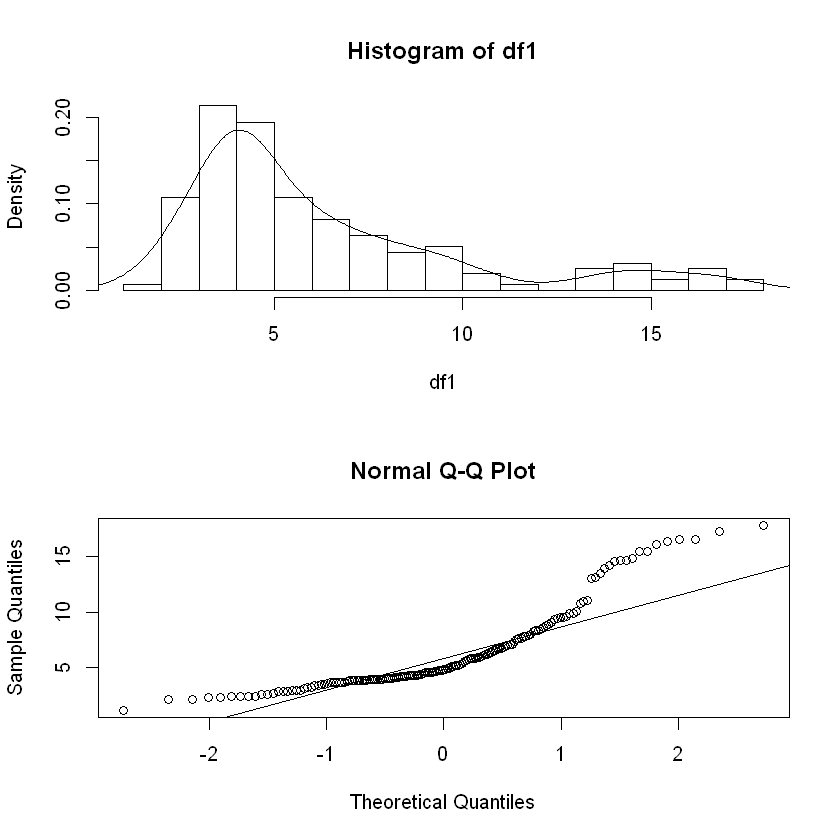

In [13]:
par(mfrow=c(2,1))        # set up the graphics 
hist(df1, prob=TRUE, 12)   # histogram    
lines(density(df1))     # density for details 
qqnorm(df1)             # normal Q-Q plot  
qqline(df1)

## Stationarity test

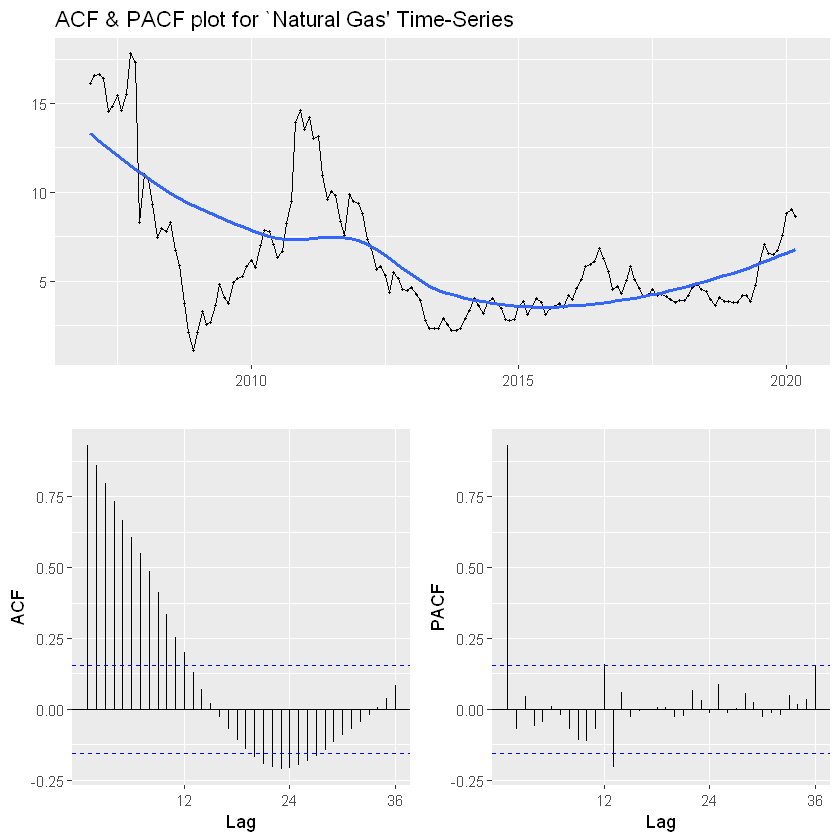

In [14]:
ggtsdisplay(df1,
            plot.type = "partial",
            main = "ACF & PACF plot for `Natural Gas' Time-Series",
            smooth = TRUE) 

In [15]:
#to check for the stationarity of the time series
adf.test(df1) # Augmented Dickey-Fuller Test 
pp.test(df1) # Phillips-Perron Unit Root Test 
kpss.test(df1) # KPSS Unit Root Test

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -1.89  0.0590
[2,]   1 -1.99  0.0469
[3,]   2 -2.01  0.0450
[4,]   3 -2.00  0.0460
[5,]   4 -1.70  0.0874
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -2.81  0.0635
[2,]   1 -3.00  0.0395
[3,]   2 -2.97  0.0431
[4,]   3 -3.07  0.0334
[5,]   4 -2.88  0.0527
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -2.35   0.429
[2,]   1 -2.54   0.347
[3,]   2 -2.36   0.422
[4,]   3 -2.53   0.354
[5,]   4 -2.53   0.354
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   4 -3.61    0.27
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4 -10.6   0.129
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4 -10.3    0.44
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 
KPSS Unit Root Test 
alternative: nonstationary 

## Normalization

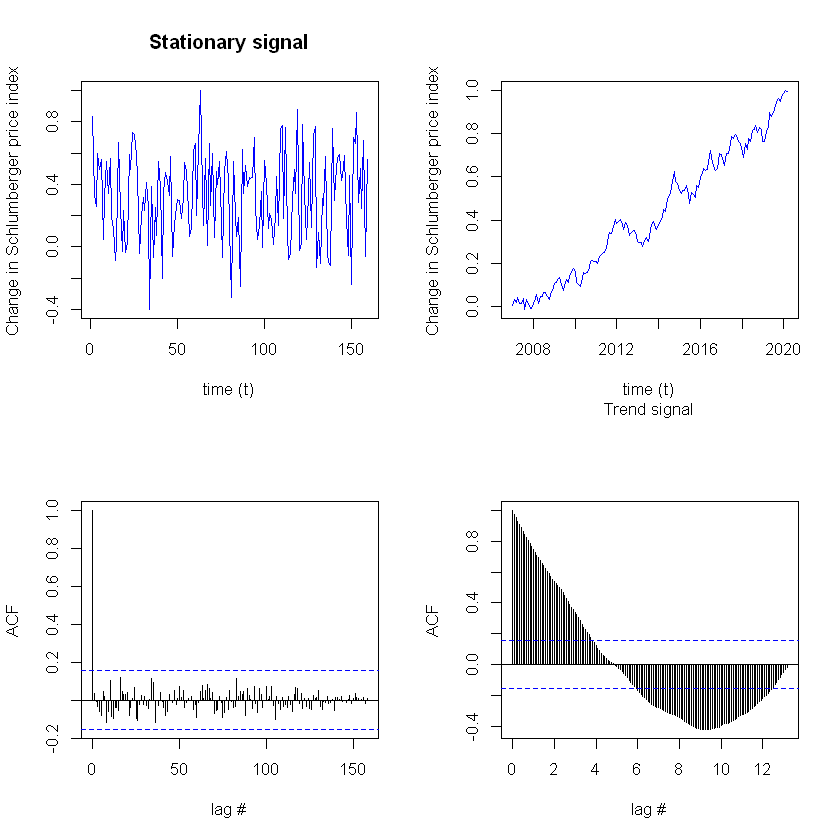

In [16]:
# Normalize the time series using mean & std
NG_stationary <- rnorm(length(df1), mean=1, sd=1) 

# time series with a trend
NG_trend <- cumsum(rnorm(length(df1), mean=1, sd=4)) + df1/100 

# normalize each trend & starionary
NG_stationary <- NG_stationary / max(NG_stationary) 
NG_trend <- NG_trend / max(NG_trend)

#ggtsdisplay(NG_stationary, plot.type = "partial",
# main = "ACF & PACF plot for `Transformed Natural Gas' Time-Series",smooth = TRUE) 

plot.new()
frame()
par(mfcol=c(2,2))

# the stationary signal and ACF
plot(NG_stationary,
     type='l', col='blue',
     xlab = "time (t)",
     ylab = "Change in Schlumberger price index",
     main = "Stationary signal")
acf(NG_stationary, lag.max = length(NG_stationary),
         xlab = "lag #", ylab = 'ACF',main=' ')

# the trend signal and ACF
plot(NG_trend,
     type='l',col='blue',
     xlab = "time (t)",
     ylab = "Change in Schlumberger price index",
     main = "",  
     sub="Trend signal")
acf(NG_trend, lag.max = length(NG_trend),
         xlab = "lag #", ylab = 'ACF', main=' ')

We see here that:
- the stationary signal has very few lags exceeding the CI of the ACF . 
- The trend resulted in almost all lags exceeding the confidence interval. 

Therefore, it can be concluded that the ACF signal is stationary. But, the trend signal is not stationary . 
The stationary series has a better variance around the mean level, and the peaks are evidence of the interventions in the original series.

We will further decompose the time series which involves a combination of level, trend, seasonality, and noise components. Decomposition helps to provide a better understanding of problems during analysis and forecasting.

In [17]:
adf.test(NG_stationary) #to check for the stationarity of the time series
pp.test(NG_stationary)
kpss.test(NG_stationary)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -6.46  0.0100
[2,]   1 -4.00  0.0100
[3,]   2 -2.95  0.0100
[4,]   3 -2.48  0.0147
[5,]   4 -2.15  0.0324
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -12.14    0.01
[2,]   1  -8.72    0.01
[3,]   2  -7.32    0.01
[4,]   3  -6.70    0.01
[5,]   4  -6.40    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -12.13    0.01
[2,]   1  -8.72    0.01
[3,]   2  -7.33    0.01
[4,]   3  -6.74    0.01
[5,]   4  -6.45    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   4   -66    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4  -147    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4  -147    0.01
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 
KPSS Unit Root Test 
alternative: no

## Decomposing

Decomposing a time series means separating it into it’s constituent components, which are often a trend component and a random component, and if the data is seasonal, a seasonal component.

### Decomposing non-Seasonal Data
Non-seasonal time series consist of a trend component and a random component. Decomposing the time series involves tying to separate the time series into these individual components. A seasonal time series, in addition to the trend and random components, also has a seasonal component. Decomposing a seasonal time series means separating the time series into these three components. Lets estimate the trend, seasonal, and random components of the Natural Gas TS.

In [36]:
#head(NG_close)
#tail(NG_close)

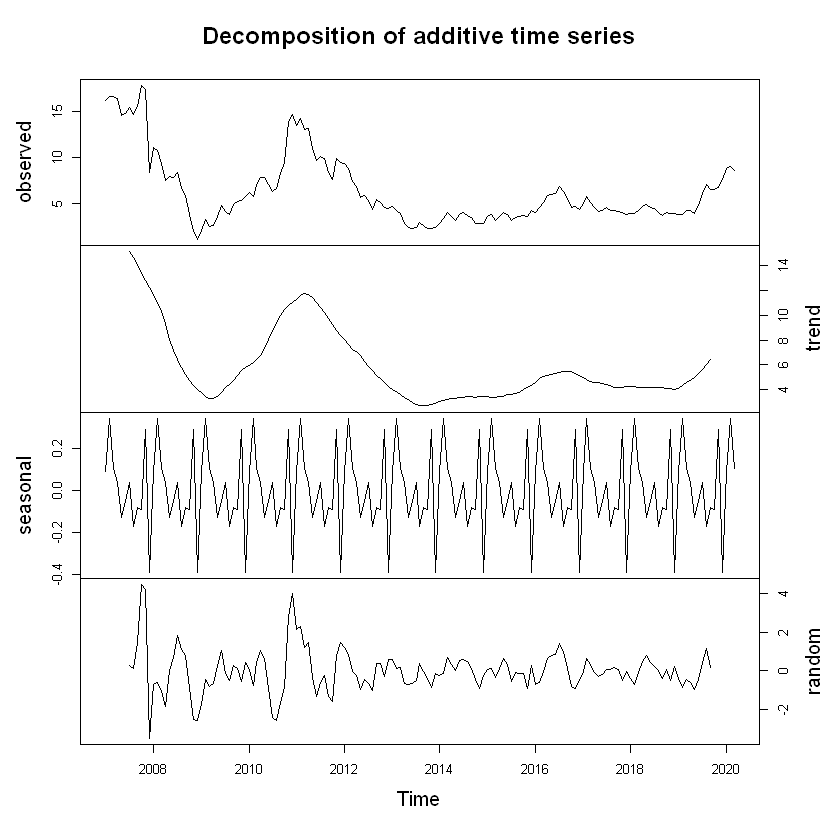

In [18]:
plot(decompose(df1), yax.flip=TRUE)  # Decompose after conversion to time-series

In [196]:
#attr(NG_close_month, 'frequency') <- 12  # Set the frequency of the xts object to yearly
#periodicity(NG_close_month)             # check periodicity: weekly 
#plot(decompose(as.ts(NG_close_month)), yax.flip=TRUE)  # Decompose after conversion to time-series

The above plot shows-
- the original time series (top), 
- the estimated trend component (second from top), 
- the estimated seasonal component (third from top), and 
- the estimated irregular component (bottom).


### Perform filtering, smoothing, and forecasting for univariate and multivariate linear Gaussian state space models. 

There is no universally accepted notation for state space models, and this is unfortunatelyreflected in different names being used for the same quantities by the different contributedpackages.  However, the most commonly used notations in statistical and econometricapplications originated in the work by Harrison and Stevens (1976), was further popularized by West and Harrison (1997), and it is the one commonly adopted in the statistical (and Bayesian in particular) literature.  The notation is also different for filtered and smoothed estimates and their variances. The main focus is on Bayesian analysis hwoever, maximum likelihood estimation of unknown parameters is also supported.  

We will start with a local level model to introduce the methodology.
A time series is a set of observation y1,.....,yn ordered in time. The base model for representing the time series is additive model.


## Structural time series
Structural time series models are (linear Gaussian) state-space models for (univariate) time series based on a decomposition of the series into a number of components. They are specified by a set of error variances, some of which may be zero.

A time series is a set of observation y1,.....,yn ordered in time. The base model for representing the time series is additive model.

- yt = μt + ϒt + εt, t = 1,....,n
    - μt is a slowly varying component called the trend;
    - ϒt is a periodic component of fixed period and called as seasonal;
    - εt is random noise or irregual component called error;
    
To develop suitable models  and  μt and ϒt, we need the concept of random walk.

Consider the simple form of model in which μt = αt, where αt is random walk, no seasonal is present and all random variables are normally distributed. We assume that εt has constant variance σ2ε. This gives the model:
- yt = αt + εt, εt ~ N(0,σ2ε)
- αt+1 = αt + ηt, ηt ~ N(0,σ2η)

for t = 1,.....,n,  where εt's and ηt's are mutually independent and indedendent on α1. There are two parameters, σ2ε and σ2η. It is an ARIMA(0,1,1) model, but with restrictions on the parameter set.

This is called local level model and provides the basis for our analysis. It exhibits the charecteristics structure of state space models inwhich there is a series of unobserved values α1,....,αn, called the states which represents the development over time of the system under study together with a set of observations y1,....,yn, which are related to the αt's by the state space model. This model is suitable for both Classical and Bayesian analysis. Where εt's and ηt's are not normally distributed we obtain equivalent results from the standpoint of minimum variance linear unbiased estimation.

Intially we assume that,  α1 ~ N(α1,P1), where α1 and P1 are known and that σ2ε and σ2η are known. Since, random walk are non-stationary, the model is non-stationary and the distribution of random variables yt and αt depend on time t.

The local linear trend model, type = "trend", has the same measurement equation, but with a time-varying slope in the dynamics. 
The basic structural model, type = "BSM", is a local trend model with an additional seasonal component. 

In case of multi-variate analysis, because of serial correlation between the observations yt, the routine computations rapidly become cubersome as n increases. Therefore, to imporve upon this naive approach, filtering smoothing techniques can be used.

In [105]:
# converting xts object to time-series with monthly frequency
#ng_ts = as.ts(NG_close_month, start=c(2007,1), end=c(2020,3))



Call:
StructTS(x = df1, type = "level")

Variances:
  level  epsilon  
   1.26     0.00  

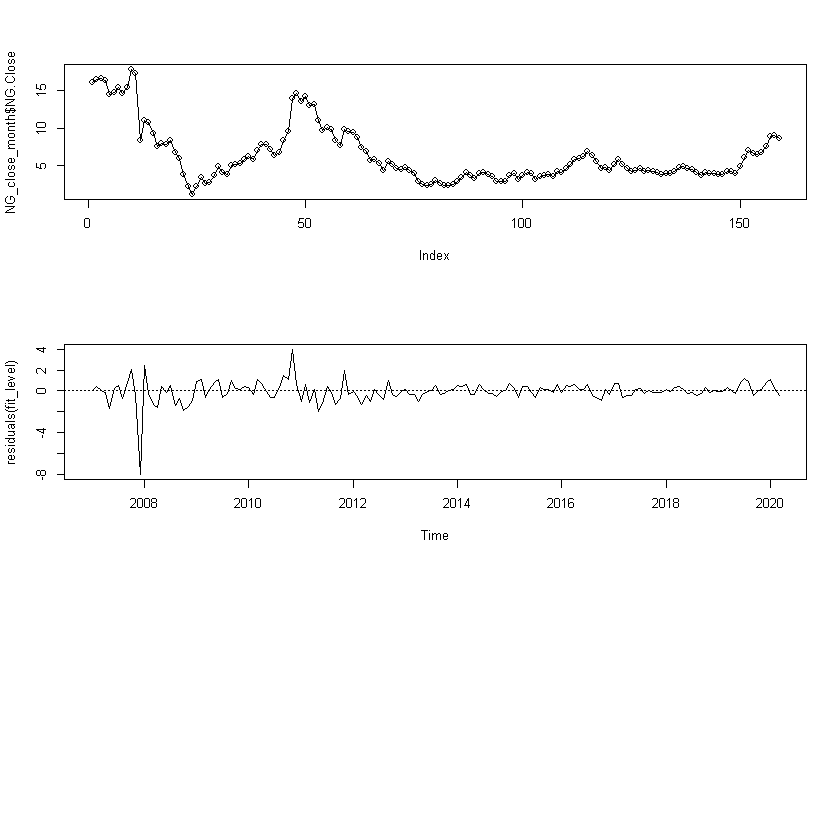

In [19]:
## Structural time series models
par(mfrow = c(3, 1))
plot(NG_close_month$NG.Close, type ='o')

## local level model
(fit_level <- StructTS(df1, type = "level"))

lines(fitted(fit_level), lty = "dashed", lwd = 2)  # contemporaneous smoothing
lines(tsSmooth(fit_level), lty = "dotted", lwd = 2) # fixed-interval smoothing
plot(residuals(fit_level)); abline(h = 0, lty = 3)

- The maximum likelihood estimates (MLEs) of the level and observation error variances, 0.869 and 0.004 respectively.


In [20]:
pred <- predict(fit_level, n.ahead = 12)

## with 50% confidence interval
#ts.union(NG_close_month, pred$pred,
        #pred$pred + 0.5*pred$se, pred$pred - 0.5*pred$se)
#legend('topright', lty=1, legend=c('Prediction_50% confidence interval'))
#ts.union(NG_close_month, pred$pred,
        #pred$pred + 0.9*pred$se, pred$pred - 0.9*pred$se)
#legend('topright', lty=1, legend=c('Prediction_90% confidence interval'))


In [207]:
## with 50% confidence interval
#ts.pred(df1, pred$pred,
        #pred$pred + 0.5*pred$se, pred$pred - 0.5*pred$se)
#legend('topright', lty=1, legend=c('Prediction_50% confidence interval'))
#ts.pred(df1, pred$pred,
        #pred$pred + 0.9*pred$se, pred$pred - 0.9*pred$se)
#legend('topright', lty=1, legend=c('Prediction_90% confidence interval'))

ERROR: Error in ts.pred(df1, pred$pred, pred$pred + 0.5 * pred$se, pred$pred - : could not find function "ts.pred"


In [21]:
str(pred)

List of 2
 $ pred: Time-Series [1:12] from 2020 to 2021: 8.61 8.61 8.61 8.61 8.61 ...
 $ se  : Time-Series [1:12] from 2020 to 2021: 1.12 1.59 1.94 2.25 2.51 ...


In [22]:
pred

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

$pred
         Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep
2020                         8.61375 8.61375 8.61375 8.61375 8.61375 8.61375
2021 8.61375 8.61375 8.61375                                                
         Oct     Nov     Dec
2020 8.61375 8.61375 8.61375
2021                        

$se
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2020                            1.122623 1.587629 1.944440 2.245246 2.510261
2021 3.550045 3.723319 3.888880                                             
          Sep      Oct      Nov      Dec
2020 2.749853 2.970181 3.175257 3.367869
2021


## Forecasts for structural time series
Below plot shows the forecasted Close price data until 2020, togeher with 50% and 90% probability intervals.

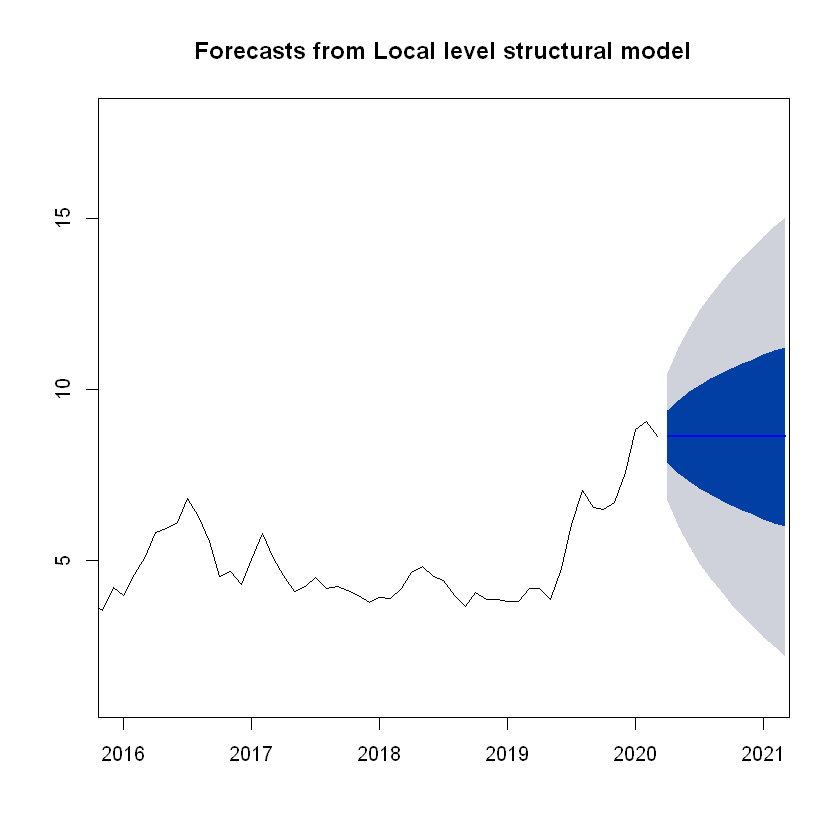

In [23]:
plot(forecast::forecast(fit_level, level = c(50, 90), h = 12), xlim = c(2016, 2021))

## ARIMA Model

In [24]:
# recommended setting
auto.arima(df1, trace = T, stepwise = F, approximation = F)


 ARIMA(0,1,0)                               : 486.9613
 ARIMA(0,1,0)            with drift         : 488.7279
 ARIMA(0,1,0)(0,0,1)[12]                    : 487.0141
 ARIMA(0,1,0)(0,0,1)[12] with drift         : 488.9073
 ARIMA(0,1,0)(0,0,2)[12]                    : 484.6955
 ARIMA(0,1,0)(0,0,2)[12] with drift         : 486.5706
 ARIMA(0,1,0)(1,0,0)[12]                    : 487.9155
 ARIMA(0,1,0)(1,0,0)[12] with drift         : 489.7659
 ARIMA(0,1,0)(1,0,1)[12]                    : 486.3992
 ARIMA(0,1,0)(1,0,1)[12] with drift         : 488.3125
 ARIMA(0,1,0)(1,0,2)[12]                    : 486.7768
 ARIMA(0,1,0)(1,0,2)[12] with drift         : 488.6773
 ARIMA(0,1,0)(2,0,0)[12]                    : 484.7122
 ARIMA(0,1,0)(2,0,0)[12] with drift         : 486.6098
 ARIMA(0,1,0)(2,0,1)[12]                    : 486.8163
 ARIMA(0,1,0)(2,0,1)[12] with drift         : 488.7398
 ARIMA(0,1,0)(2,0,2)[12]                    : 488.8758
 ARIMA(0,1,0)(2,0,2)[12] with drift         : 490.8133
 ARIMA(0,

Series: df1 
ARIMA(0,1,0)(0,0,2)[12] 

Coefficients:
        sma1     sma2
      0.1418  -0.2364
s.e.  0.1126   0.1078

sigma^2 estimated as 1.212:  log likelihood=-239.27
AIC=484.54   AICc=484.7   BIC=493.73


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 23.671, df = 24, p-value = 0.4805

Model df: 0.   Total lags used: 24



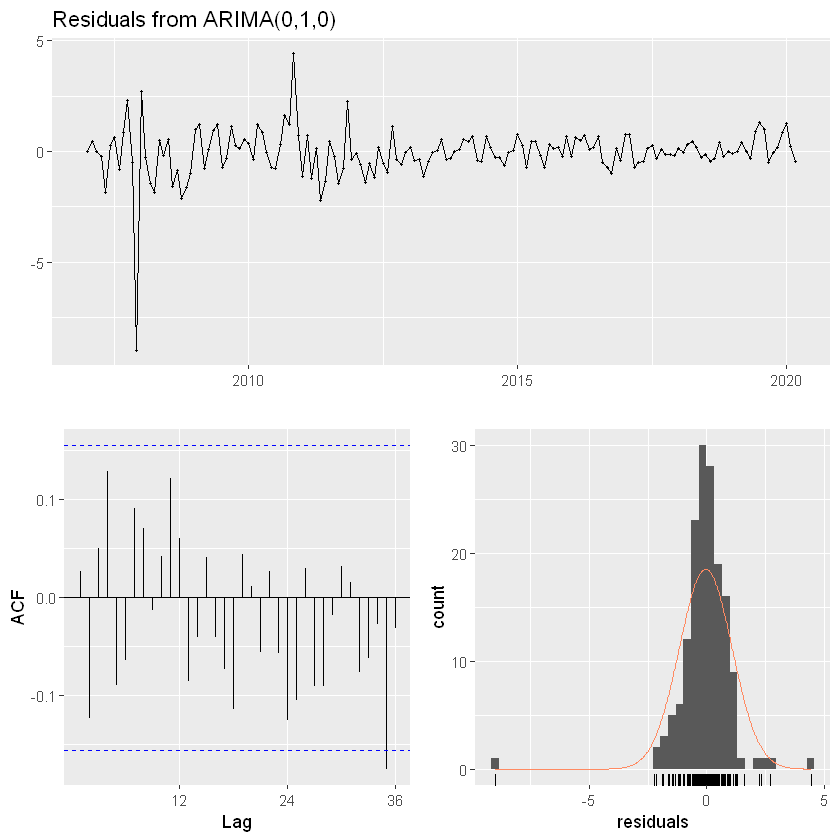

In [25]:
# Arima 
arima <- Arima(df1, order = c(0,1,0))
checkresiduals(arima)

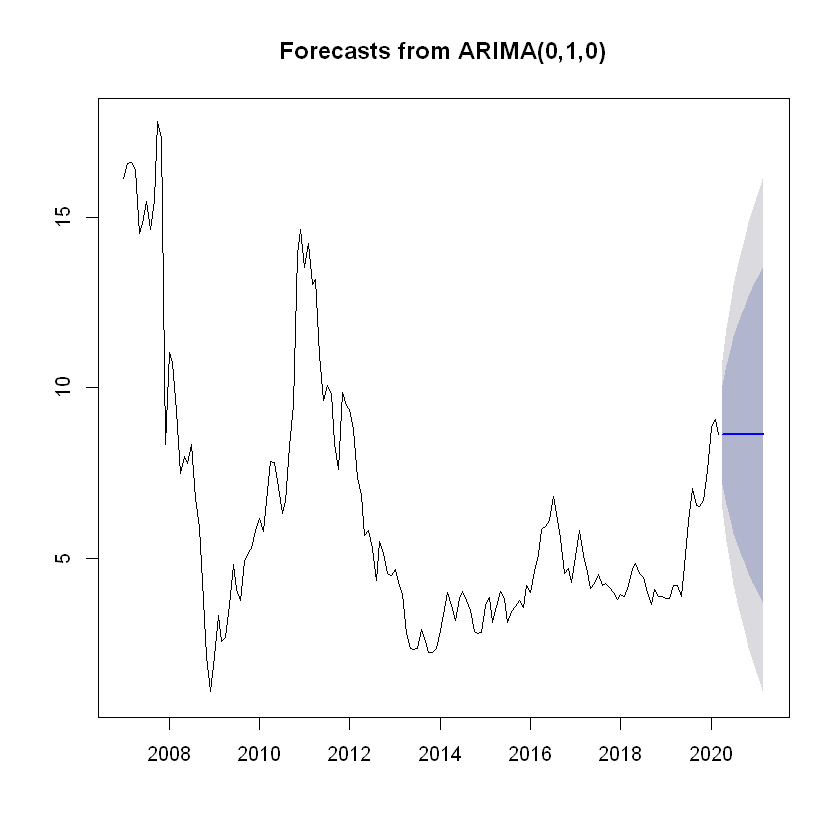

In [26]:
## ARIMA Forecasting

# Forecast of 12 months
pred_arima <- forecast::forecast(arima, h=12)
plot(pred_arima)

In [27]:
pred_arima

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Apr 2020        8.61375 7.175050 10.05245 6.4134481 10.81405
May 2020        8.61375 6.579121 10.64838 5.5020531 11.72545
Jun 2020        8.61375 6.121848 11.10565 4.8027152 12.42478
Jul 2020        8.61375 5.736350 11.49115 4.2131461 13.01435
Aug 2020        8.61375 5.396719 11.83078 3.6937253 13.53377
Sep 2020        8.61375 5.089669 12.13783 3.2241330 14.00337
Oct 2020        8.61375 4.807307 12.42019 2.7922982 14.43520
Nov 2020        8.61375 4.544492 12.68301 2.3903563 14.83714
Dec 2020        8.61375 4.297650 12.92985 2.0128442 15.21466
Jan 2021        8.61375 4.064181 13.16332 1.6557843 15.57172
Feb 2021        8.61375 3.842122 13.38538 1.3161740 15.91133
Mar 2021        8.61375 3.629947 13.59755 0.9916805 16.23582

## State-space models
State-space models are based on the idea that the time series (Yt) is an incomplete and noisy function of some underlying unobservable process (θt, t = 1, 2, . . .), called the state process. The first, important class of state-space models is given by Gaussian linear state-space models which is dynamic linear models (DLM).

### Dynamic Linear Model (DLM)
The basic aspects of DLM can be illustrated as:

Considering the problem of determining the position θ of an object, based on some measurements (Y1, Y2, . . .) affected
by random errors. here, our problem is dynamic problem and the position of the object which is "price" changes between two consecutive measurements. In this case we need to make an assumptions on the dynamics.
- the observable process (Yt; t = 1, 2, . . .) is thought of as determined by a latent process (θt; t = 1, 2, . . .), up to Gaussian random errors. If we knew the position of the object at successive time points, the Yt’s would be independent: what remain are only unpredictable measurement errors. Furthermore, the observation Yt depends only on the position #t of the target at time t;
- the latent process (θt) has a fairly simple dynamics: θt does not depend on the entire past trajectory but only on the previous position θt−1, through a linear relationship, up to Gaussian random errors;
- estimation and forecasting can be obtained sequentially, as new data become available. The example illustrates the role played by the modeling assumptions (in particular by the observational variance and system variance) in the updating mechanism.

The assumption of linearity and Gaussianity is specific of DLMs, but the dependence structure of the process (Yt) is what we assume in general statespace models.

DLM can be specified by means of two equations
- Yt = Ft θt + vt, vt ~ Nm(0, Vt); [observation equation]
- θt = Gt θt−1 + wt, wt ~ Np(0, Wt); [system equation]

here, Gt and Ft are known matrices and the (vt) and (wt) are two independent white noise sequences (i.e., they are independent, both between them and within each of them), with mean zero and known covariance matrices Vt and Wt respectively. 

The general state space model for a univariate time series (Yt, t = 1, 2, . . .) is the so-called random walk plus noise model, defined by:
- Yt = ht(θt, vt), vt ~ N(0, V )
- θt = gt(θt−1, wt), wt ~ N(0,W)

with arbitrary functions gt and ht which is more flexible. The error sequences (vt) and (wt) are independent, both within them and between them.

Linear state space models specify gt and ht as linear functions, and Gaussian linear models add the assumptions of Gaussian distributions. The assumption of Normality is sensible in many applications, and it can be justified by central limit theorem
arguments.

Intuitively, it is appropriate for time series showing no clear trend or seasonal variation: the observations (Yt) are modeled as random fluctuations (noisy observation) around a level (θt); in turn, the level can evolve randomly over time (described by a random walk). This is why the model is also called local level model; if W = 0, we are back to the constant mean model. Note that Yt is modeled as a noisy observation of the random walk θt, which is non-stationary. Indeed, DLM can be used for modeling non-stationary time series. On the contrary, the usual ARMA models require a preliminary transformation of the data for getting
stationarity.

### Stochastic level and deterministic seasonal
Considering a local level model polynomial DLM (a local linear trend is a polynomial DLM of order 2) and seasonal component 12.

In [28]:
# forecasting using dlm model
# local level and seasonal model (Stochastic level and deterministic seasonal)

model <- function(p) {
    return(
      dlmModPoly(2, dV=p[1], dW=p[2:3]) +
      dlmModSeas(12, dV=p[4])
    )
}

# estimating parameters
mle <- dlmMLE(df1, parm = c(0.1, 0.001, 1, 1), build = model)
if (mle$convergence == 0) print('converge') else print('did not converge')

[1] "converge"


In [29]:
str(model)

function (p)  
 - attr(*, "srcref")= 'srcref' int [1:8] 4 10 9 1 10 1 4 9
  ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x0000000052f04068> 


In [30]:
unlist(mle)

par1 
                             "-0.449999959823066" 
                                             par2 
                             "-0.717259078169689" 
                                             par3 
                            "0.00538016074363137" 
                                             par4 
                              "0.450000040202959" 
                                            value 
                               "265.744146221033" 
                                  counts.function 
                                             "41" 
                                  counts.gradient 
                                             "41" 
                                      convergence 
                                              "0" 
                                          message 
"CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [31]:
mle$par

[1] -0.449999960 -0.717259078  0.005380161  0.450000040

In [32]:
modelfit = model(mle$par) # fitting the dlm model
str(modelfit)

List of 10
 $ m0 : num [1:13] 0 0 0 0 0 0 0 0 0 0 ...
 $ C0 : num [1:13, 1:13] 1e+07 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 ...
 $ FF : num [1, 1:13] 1 0 1 0 0 0 0 0 0 0 ...
 $ V  : num [1, 1] 8.04e-08
 $ GG : num [1:13, 1:13] 1 0 0 0 0 0 0 0 0 0 ...
 $ W  : num [1:13, 1:13] -0.717 0 0 0 0 ...
 $ JFF: NULL
 $ JV : NULL
 $ JGG: NULL
 $ JW : NULL
 - attr(*, "class")= chr "dlm"


## Kalman Filter
The objective of filtering is to update our knowledge of the system each time a new observation yt is brought in.

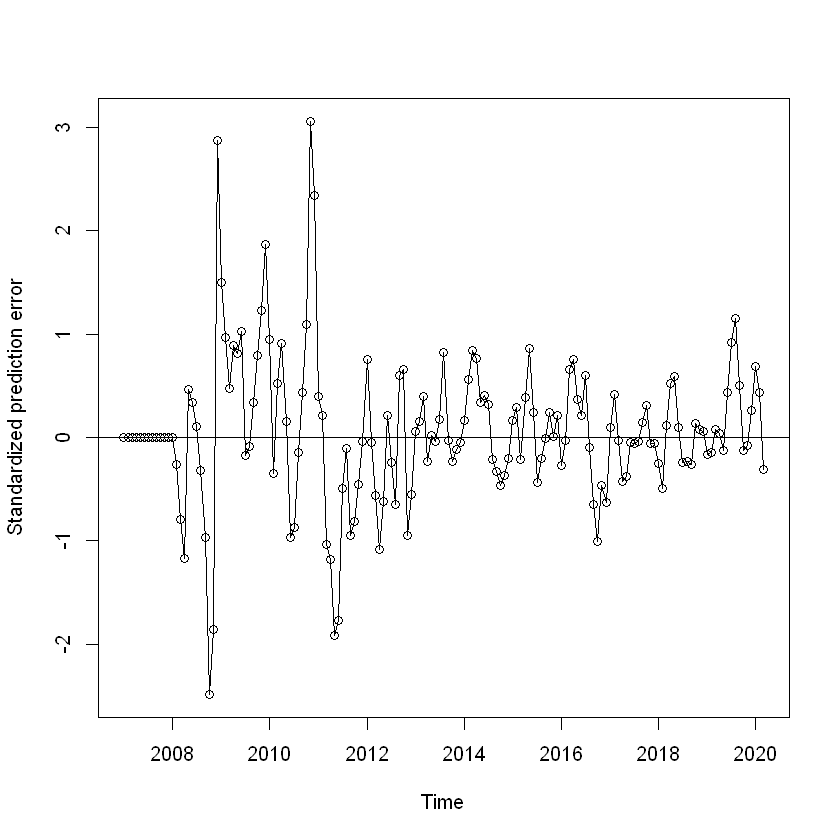

In [33]:
# applying kalman filter
model_filter <- dlmFilter(df1, modelfit)
plot(residuals(model_filter, sd = FALSE), type = "o", ylab = "Standardized prediction error")
abline(h = 0)

In [34]:
str(model_filter,1)

List of 9
 $ y  : Time-Series [1:159] from 2007 to 2020: 16.1 16.6 16.6 16.4 14.5 ...
 $ mod:List of 10
  ..- attr(*, "class")= chr "dlm"
 $ m  : Time-Series [1:160, 1:13] from 2007 to 2020: 0 10.7 21.7 19.6 18.9 ...
 $ U.C:List of 160
 $ D.C: num [1:160, 1:13] 3.16e+03 2.00e-04 2.00e-04 2.00e-04 2.00e-04 ...
 $ a  : Time-Series [1:159, 1:13] from 2007 to 2020: 0 12.1 27 22.1 20.5 ...
 $ U.R:List of 159
 $ D.R: num [1:159, 1:13] 10916 8162 5192 4498 4165 ...
 $ f  : Time-Series [1:159] from 2007 to 2020: 0 4.21 27.58 22.37 20.6 ...
 - attr(*, "class")= chr "dlmFiltered"


The last number in the display is the variance of the filtering distribution of the 156-th state vector. Note that m0 and C0 are included in the output, which is the reason why U.C has one element more than U.R, and m and U.D one row more than a and D.R.

### Kalman smoother = dlmSmooth

The Kalman smoother allows to compute the densities of θt|DT , starting from t = T−1, in which case θT|DT ~ N(sT = mT , ST = CT ), and then proceeding backward for computing the densities of θt|DT for t = T−2, t = T−3, etc.

In [35]:
# applying kalman smoother
model_smoothed <- dlmSmooth(df1, modelfit)
str(model_smoothed,1)

List of 3
 $ s  : Time-Series [1:160, 1:13] from 2007 to 2020: 16.7 16.3 16.1 16.1 16 ...
 $ U.S:List of 160
 $ D.S: num [1:160, 1:13] 2.03 2.02 2.02 2.01 2.01 ...


In [36]:
with(model_smoothed, drop(dlmSvd2var(U.S[[15]], D.S[15,])))

[,1]         [,2]         [,3]         [,4]         [,5]        
 [1,]  0.306692680 -0.005469964 -0.306692651 -0.077124140  0.023906234
 [2,] -0.005469964  0.034596939  0.005469964  0.006016816  0.001889927
 [3,] -0.306692651  0.005469964  0.306692702  0.077124124 -0.023906242
 [4,] -0.077124140  0.006016816  0.077124124  0.306955807  0.074523469
 [5,]  0.023906234  0.001889927 -0.023906242  0.074523469  0.332614855
 [6,]  0.059991993 -0.000114054 -0.059991996 -0.025022407  0.085520176
 [7,]  0.070676031 -0.001132145 -0.070676032 -0.060437444 -0.020647438
 [8,]  0.072918439 -0.001783096 -0.072918439 -0.070877627 -0.058463962
 [9,]  0.071876300 -0.002319728 -0.071876301 -0.073051252 -0.069573156
[10,]  0.067008682 -0.002803972 -0.067008683 -0.071996848 -0.071856601
[11,]  0.053995605 -0.003180149 -0.053995606 -0.067117277 -0.070910664
[12,]  0.025318878 -0.003238768 -0.025318881 -0.054022288 -0.066834315
[13,] -0.026440465 -0.002468457  0.026440463 -0.025009188 -0.057059767
      [,6]         [,7]         [,8]         [,9]         [,10]       
 [1,]  0.059991993  0.070676031  0.072918439  0.071876300  0.067008682
 [2,] -0.000114054 -0.001132145 -0.001783096 -0.002319728 -0.002803972
 [3,] -0.059991996 -0.070676032 -0.072918439 -0.071876301 -0.067008683
 [4,] -0.025022407 -0.060437444 -0.070877627 -0.073051252 -0.071996848
 [5,]  0.085520176 -0.020647438 -0.058463962 -0.069573156 -0.071856601
 [6,]  0.337322409  0.087388441 -0.019806879 -0.057906891 -0.069059388
 [7,]  0.087388441  0.338059860  0.087718326 -0.019586976 -0.057700951
 [8,] -0.019806879  0.087718326  0.338206516  0.087816702 -0.019493347
 [9,] -0.057906891 -0.019586976  0.087816702  0.338272090  0.087878102
[10,] -0.069059388 -0.057700951 -0.019493347  0.087878102  0.338327117
[11,] -0.071386140 -0.068867920 -0.057612540 -0.019436272  0.087927015
[12,] -0.070782772 -0.071329513 -0.068839647 -0.057595676 -0.019425314
[13,] -0.068130021 -0.071292997 -0.071557167 -0.068991797 -0.057739127
      [,11]        [,12]        [,13]       
 [1,]  0.053995605  0.025318878 -0.026440465
 [2,] -0.003180149 -0.003238768 -0.002468457
 [3,] -0.053995606 -0.025318881  0.026440463
 [4,] -0.067117277 -0.054022288 -0.025009188
 [5,] -0.070910664 -0.066834315 -0.057059767
 [6,] -0.071386140 -0.070782772 -0.068130021
 [7,] -0.068867920 -0.071329513 -0.071292997
 [8,] -0.057612540 -0.068839647 -0.071557167
 [9,] -0.019436272 -0.057595676 -0.068991797
[10,]  0.087927015 -0.019425314 -0.057739127
[11,]  0.338368471  0.087932811 -0.019559559
[12,]  0.087932811  0.338363328  0.087891744
[13,] -0.019559559  0.087891744  0.338715964

In [37]:
with(model_smoothed, drop(dlmSvd2var(U.S[[51]], D.S[51,])))

[,1]         [,2]          [,3]         [,4]         [,5]        
 [1,]  0.261917465 -1.015951e-03 -0.261917434 -0.041004229  0.026737138
 [2,] -0.001015951  3.106048e-02  0.001015951  0.001300728  0.001077717
 [3,] -0.261917434  1.015951e-03  0.261917483  0.041004212 -0.026737144
 [4,] -0.041004229  1.300728e-03  0.041004212  0.261919361  0.041033442
 [5,]  0.026737138  1.077717e-03 -0.026737144  0.041033442  0.262164793
 [6,]  0.040440855  7.557410e-04 -0.040440856 -0.026690868  0.041411050
 [7,]  0.042373540  4.264987e-04 -0.042373540 -0.040391294 -0.026292087
 [8,]  0.043370255  9.886662e-05 -0.043370255 -0.042332044 -0.040064000
 [9,]  0.043762510 -2.227555e-04 -0.043762510 -0.043344402 -0.042137816
[10,]  0.041770686 -5.219983e-04 -0.041770686 -0.043757799 -0.043324083
[11,]  0.034709990 -7.631416e-04 -0.034709991 -0.041791665 -0.043939426
[12,]  0.017951916 -8.766970e-04 -0.017951918 -0.034758159 -0.042176942
[13,] -0.014082086 -7.529508e-04  0.014082085 -0.018020571 -0.035288156
      [,6]         [,7]          [,8]          [,9]          [,10]        
 [1,]  0.040440855  0.0423735397  4.337025e-02  0.0437625096  0.0417706858
 [2,]  0.000755741  0.0004264987  9.886662e-05 -0.0002227555 -0.0005219983
 [3,] -0.040440856 -0.0423735398 -4.337025e-02 -0.0437625098 -0.0417706863
 [4,] -0.026690868 -0.0403912945 -4.233204e-02 -0.0433444024 -0.0437577993
 [5,]  0.041411050 -0.0262920872 -4.006400e-02 -0.0421378165 -0.0433240827
 [6,]  0.262744700  0.0420229090 -2.579058e-02 -0.0397673859 -0.0421084171
 [7,]  0.042022909  0.2633899734  4.255145e-02 -0.0254785049 -0.0397373251
 [8,] -0.025790577  0.0425514536  2.638225e-01  0.0428061935 -0.0254550029
 [9,] -0.039767386 -0.0254785049  4.280619e-02  0.2639715732  0.0428183872
[10,] -0.042108417 -0.0397373251 -2.545500e-02  0.0428183872  0.2639699835
[11,] -0.043604054 -0.0424043673 -3.998056e-02 -0.0255998433  0.0428024182
[12,] -0.044530335 -0.0442271109 -4.291457e-02 -0.0402815780 -0.0256284795
[13,] -0.042987864 -0.0453843400 -4.492520e-02 -0.0433246009 -0.0403175532
      [,11]         [,12]        [,13]        
 [1,]  0.0347099902  0.017951916 -0.0140820862
 [2,] -0.0007631416 -0.000876697 -0.0007529508
 [3,] -0.0347099913 -0.017951918  0.0140820847
 [4,] -0.0417916650 -0.034758159 -0.0180205710
 [5,] -0.0439394262 -0.042176942 -0.0352881557
 [6,] -0.0436040545 -0.044530335 -0.0429878643
 [7,] -0.0424043673 -0.044227111 -0.0453843400
 [8,] -0.0399805563 -0.042914568 -0.0449251996
 [9,] -0.0255998433 -0.040281578 -0.0433246009
[10,]  0.0428024182 -0.025628479 -0.0403175532
[11,]  0.2641041272  0.043088463 -0.0252340163
[12,]  0.0430884631  0.264705681  0.0439125677
[13,] -0.0252340163  0.043912568  0.2658310829

In [38]:
with(model_filter, drop(dlmSvd2var(U.C[[51]], D.C[51,])))

[,1]        [,2]         [,3]        [,4]          [,5]        
 [1,]  0.73355499  0.060329346 -0.73355496 -0.2696890191 -0.052418563
 [2,]  0.06032935  0.069900908 -0.06032934 -0.0199866062 -0.001766206
 [3,] -0.73355496 -0.060329343  0.73355500  0.2696889987  0.052418554
 [4,] -0.26968902 -0.019986606  0.26968900  0.4310545446  0.133136640
 [5,] -0.05241856 -0.001766206  0.05241855  0.1331366396  0.370137905
 [6,]  0.03731502  0.005210433 -0.03731502  0.0002208068  0.110781101
 [7,]  0.07537594  0.007667143 -0.07537594 -0.0556102373 -0.006716038
 [8,]  0.09476035  0.008509529 -0.09476035 -0.0815878511 -0.057316499
 [9,]  0.10520962  0.008624908 -0.10520962 -0.0955658210 -0.081324670
[10,]  0.10772172  0.008154393 -0.10772172 -0.1016814583 -0.093971951
[11,]  0.10120011  0.007062094 -0.10120011 -0.0995968182 -0.098701175
[12,]  0.08323024  0.005206367 -0.08323023 -0.0874099195 -0.094679907
[13,]  0.04599642  0.002029590 -0.04599642 -0.0595673896 -0.078382212
      [,6]          [,7]         [,8]         [,9]         [,10]       
 [1,]  0.0373150184  0.075375940  0.094760348  0.105209623  0.107721718
 [2,]  0.0052104330  0.007667143  0.008509529  0.008624908  0.008154393
 [3,] -0.0373150220 -0.075375942 -0.094760348 -0.105209623 -0.107721718
 [4,]  0.0002208068 -0.055610237 -0.081587851 -0.095565821 -0.101681458
 [5,]  0.1107811006 -0.006716038 -0.057316499 -0.081324670 -0.093971951
 [6,]  0.3631416297  0.109825870 -0.005959288 -0.056411503 -0.080713849
 [7,]  0.1098258699  0.364445988  0.111452540 -0.004864838 -0.056195906
 [8,] -0.0059592879  0.111452540  0.365981518  0.112385471 -0.004790548
 [9,] -0.0564115028 -0.004864838  0.112385471  0.366521433  0.112395915
[10,] -0.0807138487 -0.056195906 -0.004790548  0.112395915  0.366480285
[11,] -0.0937149075 -0.081476170 -0.057070349 -0.005363393  0.112300000
[12,] -0.0985005056 -0.095266764 -0.083174617 -0.058164957 -0.005526424
[13,] -0.0933517066 -0.100086026 -0.097286362 -0.084542027 -0.058443714
      [,11]        [,12]        [,13]      
 [1,]  0.101200113  0.083230235  0.04599642
 [2,]  0.007062094  0.005206367  0.00202959
 [3,] -0.101200112 -0.083230234 -0.04599642
 [4,] -0.099596818 -0.087409919 -0.05956739
 [5,] -0.098701175 -0.094679907 -0.07838221
 [6,] -0.093714908 -0.098500506 -0.09335171
 [7,] -0.081476170 -0.095266764 -0.10008603
 [8,] -0.057070349 -0.083174617 -0.09728636
 [9,] -0.005363393 -0.058164957 -0.08454203
[10,]  0.112300000 -0.005526424 -0.05844371
[11,]  0.366914026  0.113170340 -0.00459324
[12,]  0.113170340  0.368646548  0.11507702
[13,] -0.004593240  0.115077024  0.37057021

In [39]:
cov <- dlmSvd2var(model_smoothed$U.S, model_smoothed$D.S)
cov

[[1]]
             [,1]          [,2]        [,3]        [,4]         [,5]
 [1,]  1.60442289 -0.1276875780  0.45516104  0.05072881  0.074228877
 [2,] -0.12768758  0.0696989137 -0.03129483 -0.00249195 -0.004498446
 [3,]  0.45516104 -0.0312948293  2.18313636 -0.90185790 -0.014947869
 [4,]  0.05072881 -0.0024919503 -0.90185790  2.33732171 -0.912611129
 [5,]  0.07422888 -0.0044984463 -0.01494787 -0.91261113  2.338059159
 [6,]  0.08146712 -0.0054045172 -0.05470068 -0.01980697 -0.912281246
 [7,]  0.08381249 -0.0060027805 -0.06613702 -0.05790689 -0.019587065
 [8,]  0.08488734 -0.0065490862 -0.06874205 -0.06905939 -0.057700942
 [9,]  0.08475486 -0.0070443108 -0.07011460 -0.07138614 -0.068867921
[10,]  0.07935276 -0.0071709602 -0.07560129 -0.07078277 -0.071329513
[11,]  0.05412812 -0.0057772514 -0.09530263 -0.06813002 -0.071292995
[12,] -0.03041152  0.0003026233 -0.14924008 -0.06274587 -0.070389920
[13,] -0.25863357  0.0179428360 -0.26262594 -0.05479779 -0.069320116
              [,6]         [,7]         [,8]         [,9]       [,10]
 [1,]  0.081467123  0.083812491  0.084887338  0.084754861  0.07935276
 [2,] -0.005404517 -0.006002781 -0.006549086 -0.007044311 -0.00717096
 [3,] -0.054700684 -0.066137023 -0.068742048 -0.070114604 -0.07560129
 [4,] -0.019806965 -0.057906889 -0.069059385 -0.071386139 -0.07078277
 [5,] -0.912281246 -0.019587065 -0.057700942 -0.068867921 -0.07132951
 [6,]  2.338205813 -0.912182868 -0.019493432 -0.057612534 -0.06883965
 [7,] -0.912182868  2.338271387 -0.912121473 -0.019436358 -0.05759567
 [8,] -0.019493432 -0.912121473  2.338326411 -0.912072557 -0.01942540
 [9,] -0.057612534 -0.019436358 -0.912072557  2.338367775 -0.91206676
[10,] -0.068839647 -0.057595670 -0.019425399 -0.912066761  2.33836263
[11,] -0.071557168 -0.068991793 -0.057739122 -0.019559644 -0.91210783
[12,] -0.072311320 -0.072231001 -0.069610678 -0.058303467 -0.01970930
[13,] -0.073357330 -0.074271522 -0.074023111 -0.071237225 -0.05872264
             [,11]         [,12]       [,13]
 [1,]  0.054128125 -0.0304115231 -0.25863357
 [2,] -0.005777251  0.0003026233  0.01794284
 [3,] -0.095302628 -0.1492400808 -0.26262594
 [4,] -0.068130021 -0.0627458680 -0.05479779
 [5,] -0.071292995 -0.0703899199 -0.06932012
 [6,] -0.071557168 -0.0723113201 -0.07335733
 [7,] -0.068991793 -0.0722310012 -0.07427152
 [8,] -0.057739122 -0.0696106783 -0.07402311
 [9,] -0.019559644 -0.0583034673 -0.07123723
[10,] -0.912107825 -0.0197092991 -0.05872264
[11,]  2.338715263 -0.9105395122 -0.01514367
[12,] -0.910539512  2.3455806025 -0.89060826
[13,] -0.015143673 -0.8906082597  2.40341664

[[2]]
             [,1]          [,2]        [,3]        [,4]        [,5]
 [1,]  0.70148773 -0.0579886739 -0.70148769  0.42386625  0.04823686
 [2,] -0.05798867  0.0643187532  0.05798867 -0.03129483 -0.00249195
 [3,] -0.70148769  0.0579886714  0.70148774 -0.42386626 -0.04823686
 [4,]  0.42386625 -0.0312948296 -0.42386626  2.18313636 -0.90185790
 [5,]  0.04823686 -0.0024919504 -0.04823686 -0.90185790  2.33732171
 [6,]  0.06973044 -0.0044984463 -0.06973044 -0.01494787 -0.91261113
 [7,]  0.07606261 -0.0054045172 -0.07606261 -0.05470068 -0.01980697
 [8,]  0.07780972 -0.0060027806 -0.07780972 -0.06613702 -0.05790689
 [9,]  0.07833826 -0.0065490862 -0.07833826 -0.06874205 -0.06905939
[10,]  0.07771056 -0.0070443108 -0.07771056 -0.07011460 -0.07138614
[11,]  0.07218180 -0.0071709602 -0.07218181 -0.07560129 -0.07078277
[12,]  0.04835088 -0.0057772514 -0.04835088 -0.09530263 -0.06813002
[13,] -0.03010890  0.0003026233  0.03010889 -0.14924008 -0.06274587
              [,6]         [,7]         [,8]         [,9]        [,10]
 [1,]  0.069730436  0.076062612  0.077809717  0.078338257  0.077710556
 [2,] -0.004498446 -0.005404517 -0.006002781 -0.006549086 -0.007044311
 [3,] -0.069730436 -0.076062612 -0.077809717 -0.078338258 -0.077710557
 [4,] -0.014947869 -0.054700684 -0.066137023 -0.068742048 -0.070114604
 [5,] -0.912611129 -0.019806965 -0.057906889 -0.069059385 -0.071386139
 [6,]  2.338059159 -0.912281246 -

In [40]:
lev.var <- sapply(cov, function(x){x[1,1]})
lev.var

[1] 1.6044229 0.7014877 0.4034173 0.3455813 0.3387159 0.3383633 0.3383684
  [8] 0.3383271 0.3382721 0.3382065 0.3380598 0.3373224 0.3326148 0.3069558
 [15] 0.3066927 0.2970647 0.2891834 0.2865308 0.2861078 0.2861038 0.2860650
 [22] 0.2858813 0.2853148 0.2837857 0.2808980 0.2784777 0.2784577 0.2769780
 [29] 0.2740739 0.2720028 0.2712440 0.2711424 0.2711326 0.2709195 0.2703039
 [36] 0.2692057 0.2679720 0.2673412 0.2673320 0.2669350 0.2658311 0.2647057
 [43] 0.2641041 0.2639700 0.2639716 0.2638225 0.2633900 0.2627447 0.2621648
 [50] 0.2619193 0.2619175 0.2617684 0.2612966 0.2607329 0.2603748 0.2602780
 [57] 0.2602826 0.2601997 0.2599518 0.2596117 0.2593401 0.2592404 0.2592440
 [64] 0.2591797 0.2589717 0.2587151 0.2585501 0.2585118 0.2585206 0.2584794
 [71] 0.2583618 0.2582225 0.2581362 0.2581241 0.2581360 0.2581075 0.2580323
 [78] 0.2579646 0.2579517 0.2579810 0.2580002 0.2579810 0.2579517 0.2579646
 [85] 0.2580323 0.2581075 0.2581360 0.2581241 0.2581362 0.2582225 0.2583618
 [92] 0.2584794 0.2585206 0.2585118 0.2585501 0.2587151 0.2589717 0.2591797
 [99] 0.2592440 0.2592404 0.2593401 0.2596117 0.2599518 0.2601997 0.2602826
[106] 0.2602780 0.2603748 0.2607329 0.2612966 0.2617684 0.2619175 0.2619193
[113] 0.2621648 0.2627447 0.2633900 0.2638225 0.2639716 0.2639700 0.2641041
[120] 0.2647057 0.2658311 0.2669350 0.2673320 0.2673412 0.2679720 0.2692057
[127] 0.2703039 0.2709195 0.2711326 0.2711424 0.2712440 0.2720028 0.2740739
[134] 0.2769780 0.2784577 0.2784778 0.2808980 0.2837857 0.2853148 0.2858813
[141] 0.2860650 0.2861038 0.2861078 0.2865308 0.2891835 0.2970647 0.3066927
[148] 0.3069558 0.3326148 0.3373224 0.3380598 0.3382065 0.3382721 0.3383271
[155] 0.3383685 0.3383633 0.3387159 0.3455813 0.4034173 0.7014878

In [41]:
sm <- dropFirst(model_smoothed$s)
mu <- c(sm[,1])
nu <- c(sm[,2])
res <- c(residuals(model_filter,sd=F))

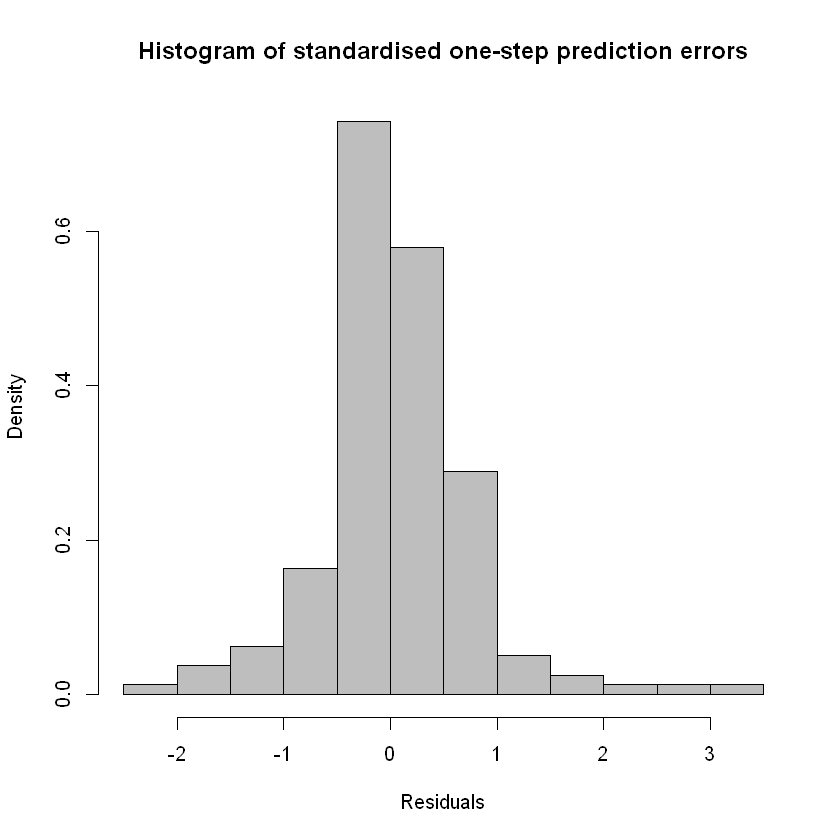

In [42]:
hist(res, prob=T, col="grey", 
     main = "Histogram of standardised one-step prediction errors",
     xlab="Residuals")

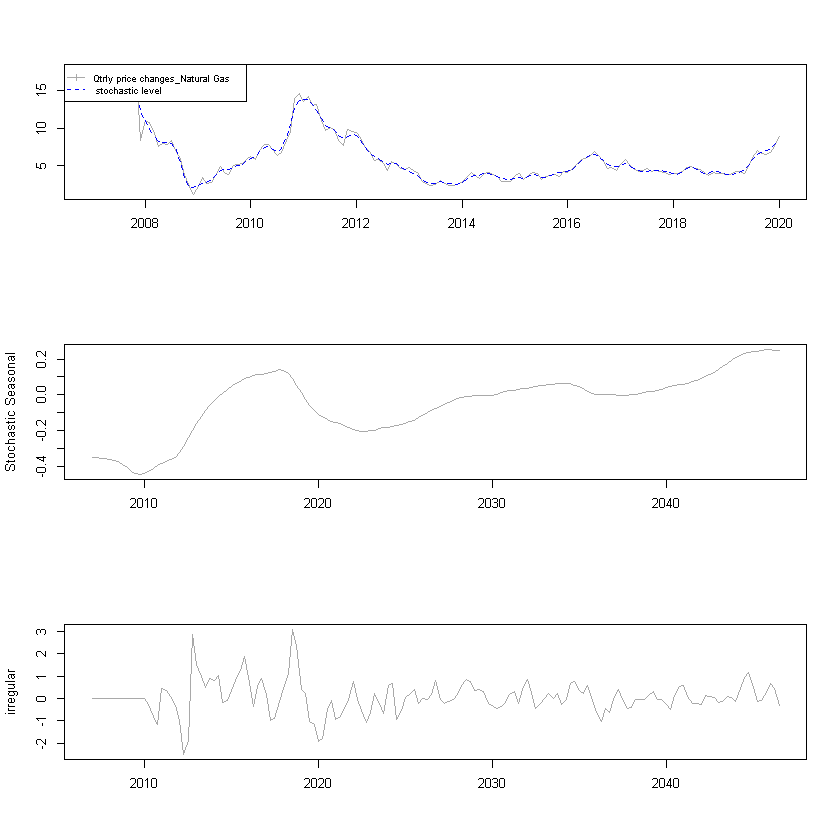

In [43]:
par(mfrow=c(3,1))

temp <- window(cbind(df1, mu),start = 2007, end = 2020)
plot(temp, plot.type="single",
col =c("darkgrey","blue"),lty=c(1,2), xlab="",ylab = "", )
legend("topleft",
leg = c("Qtrly price changes_Natural Gas"," stochastic level"),
cex = 0.7, lty = c(1, 2),col = c("darkgrey","blue"),
pch=c(3,NA),bty = "y", horiz = F)

#par(mfrow=c(1,1))
temp <- ts(nu,start = 2007,frequency =4)
plot(temp, col =c("darkgrey"),lty=1, xlab="",
ylab = "Stochastic Seasonal",main="" )

#par(mfrow=c(1,1))
temp <- ts(res, start = 2007,frequency =4)
plot(temp, col =c("darkgrey"),lty=1, xlab="",ylab = "irregular",main="" )

In [44]:
lev.ts <- ts(lev.var[-1],start = 2007, frequency =12)
wid <- qnorm(0.05, lower = FALSE) *sqrt(lev.ts)
temp <- cbind(mu, mu + wid %o% c(-1, 1))
temp <- ts(temp,start = 2007,frequency =12)

##### Level estimation error variance for stochastic level and deterministic seasonal model

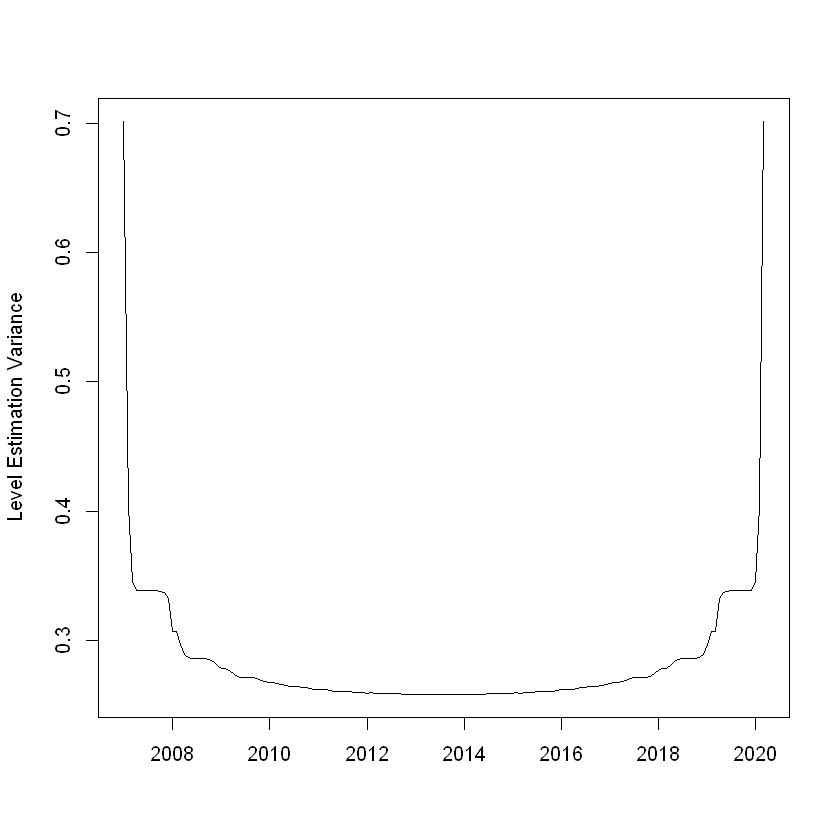

In [45]:
par(mfrow=c(1,1))
plot(lev.ts,xlab="",ylab = "Level Estimation Variance")

##### Stochastic level and its 90% confidence interval for stochastic level and deterministic seasonal model

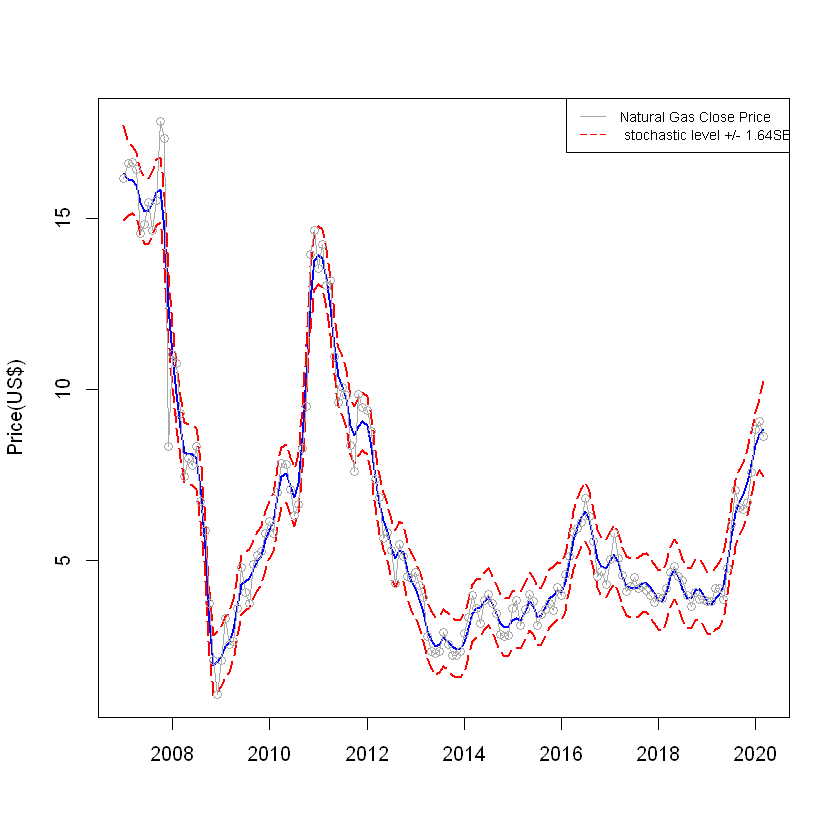

In [46]:
par(mfrow=c(1,1))
plot(temp, plot.type = "s", type = "l",lty = c(1, 5, 5),
ylab = "Price(US$)", xlab = "", ylim = range(df1),col=c("blue","red","red"),lwd=2)
lines(df1, type = "o", col = "darkgrey")
legend("topright",
leg = c("Natural Gas Close Price"," stochastic level +/- 1.64SE"),
cex = 0.7, lty = c(1, 5),col = c("darkgrey","red"),
,bty = "y", horiz = F)

In [184]:
#model_smoothed = rapply(model_smoothed, f=function(x) ifelse(is.nan(x),0,x), how="replace" )

In [47]:
forecast$f


ERROR: Error in forecast$f: object of type 'closure' is not subsettable


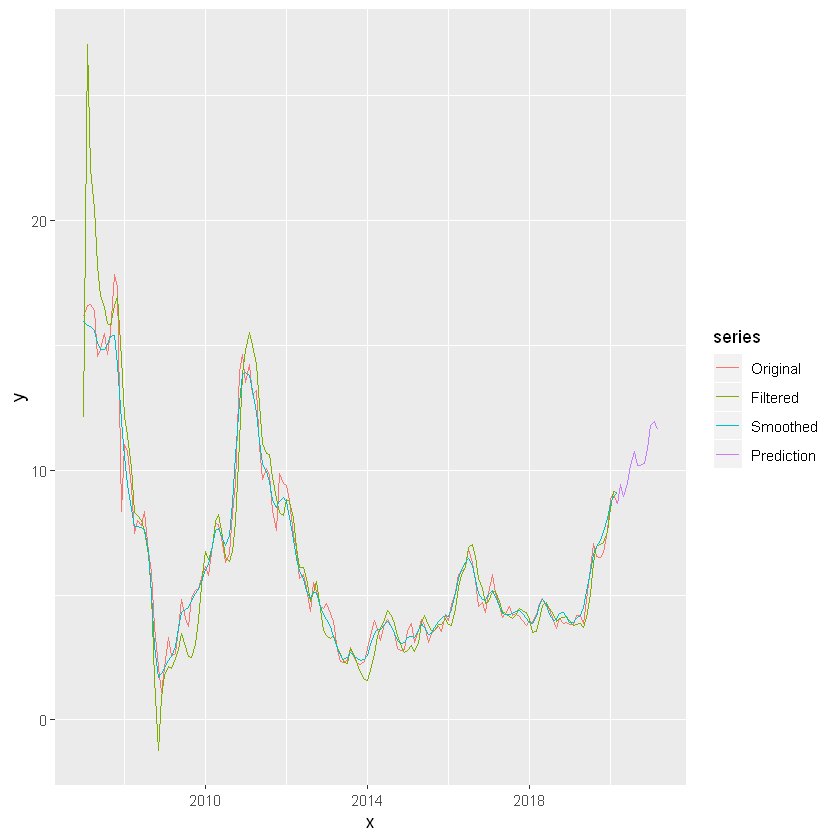

In [49]:
n <- 1*12
forecast <- dlmForecast(model_filter, nAhead=n)
 
x <- index(df1)
xf <- seq(max(x), max(x)+n/12, 1/12)
aa <- forecast$a[, -1] * (-1)
aa <- cbind(forecast$a[, 1], aa)
a <- drop(forecast$a%*%t(FF(modelfit)))
a <- c(tail(df1, 1), a)
df <- rbind(
  data.frame(x=x, y=as.numeric(df1), series="Original"),
  data.frame(x=x, y=apply(model_filter$m[-1, 1:2], 1, sum), series="Filtered"),
  data.frame(x=x, y=apply(model_smoothed$s[-1, 1:2], 1, sum), series="Smoothed"),
  data.frame(x=xf, y=a, series="Prediction")
)
dlm <- ggplot(subset(df, x>2000), aes(x=x, y=y, colour=series)) + geom_line()
dlm